In [6]:
import os, glob, sys
print("Current working directory:", os.getcwd())
print("\nFiles (top level):")
print(os.listdir('.'))

csvs = glob.glob('**/*car*.csv', recursive=True)
print("\nFound CSV files matching '*car*.csv' (recursive search):")
for p in csvs:
    print(" -", p)

if not csvs:
    print("\nNo files matched. To fix FileNotFoundError:\n"
          " 1) Put 'car data.csv' in the same folder as this notebook, OR\n"
          " 2) Use Jupyter's Upload button to upload the CSV to this folder, OR\n"
          " 3) Provide the full absolute path to your CSV (e.g., r'C:\\Users\\You\\car data.csv').")
else:
    print("\nIf the file above is the one you want, copy its path and use it in the next cell.")


Current working directory: C:\Users\Divya

Files (top level):
['.anaconda', '.conda', '.condarc', '.continuum', '.docker', '.expo', '.git', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.vscode', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'hello.py', 'Iris.csv', 'Iris.ipynb', 'Links', 'Local Settings', 'Microsoft', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{c04a3068-9501-11ef-9843-d4e98a3a3d0f}.TM.blf', 'NTUSER.DAT{c04a3068-9501-11ef-9843-d4e98a3a3d0f}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{c04a3068-9501-11ef-9843-d4e98a3a3d0f}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'StaticPage', 'Templates', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb']

Found CSV files matching '*car*.csv' (recursive search):
 - anaconda3

In [8]:

try:
    import io
    from IPython.display import display
    import ipywidgets as widgets

    uploader = widgets.FileUpload(accept='.csv', multiple=False)
    display(uploader)
    print("After choosing a file, run the next cell to read it into a DataFrame.")
except Exception as e:
    print("Upload widget not available in this environment:", e)
    print("Instead, put the CSV in the notebook folder and use the path in the next cell.")


FileUpload(value=(), accept='.csv', description='Upload')

After choosing a file, run the next cell to read it into a DataFrame.


In [15]:
import pandas as pd
import io

uploaded_file = uploader.value[0] if isinstance(uploader.value, tuple) else list(uploader.value.values())[0]

df = pd.read_csv(io.BytesIO(uploaded_file['content']))

df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nMissing values:\n", df.isnull().sum())

print("\nData types:\n", df.dtypes)

df.describe()


Shape: (301, 9)

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Data types:
 Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:

df['Car_Age'] = 2025 - df['Year']
df = df.drop(['Car_Name', 'Year'], axis=1)

df.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [18]:
df = pd.get_dummies(df, drop_first=True) 
df.head()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [23]:

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8488707839193154
RMSE: 1.8658375680942374


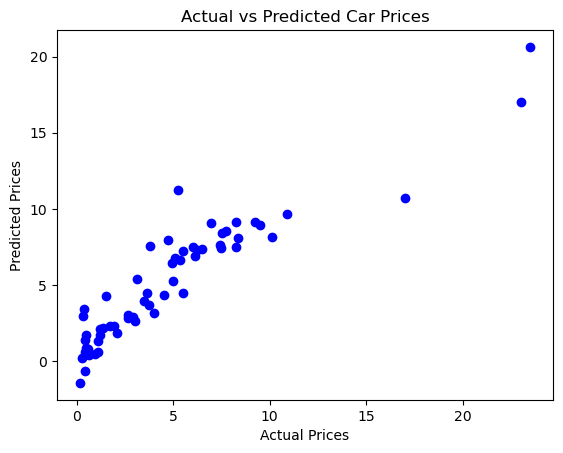

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R² Score: 0.85
Mean Absolute Error: 1.22
Mean Squared Error: 3.48
Root Mean Squared Error: 1.87


In [29]:
import joblib

joblib.dump(model, "car_price_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [31]:
import pandas as pd

new_car_data = pd.DataFrame([{
    'Present_Price': 9.50,
    'Driven_kms': 35000,
    'Owner': 0,
    'Car_Age': 5,
    'Fuel_Type_Diesel': 1,
    'Fuel_Type_Petrol': 0,
    'Selling_type_Individual': 0,
    'Transmission_Manual': 1
}])

predicted_price = loaded_model.predict(new_car_data)
print(f"Predicted Selling Price: {predicted_price[0]:.2f} lakhs")



Predicted Selling Price: 9.48 lakhs


In [32]:
import joblib

joblib.dump(model, "car_price_model.pkl")
print("Model saved as car_price_model.pkl")

Model saved as car_price_model.pkl


In [33]:
loaded_model = joblib.load("car_price_model.pkl")

In [34]:
import pandas as pd

new_car = pd.DataFrame([{
    'Present_Price': 9.50,
    'Driven_kms': 35000,
    'Owner': 0,
    'Car_Age': 7,
    'Fuel_Type_Diesel': 1,
    'Fuel_Type_Petrol': 0,
    'Selling_type_Individual': 0,
    'Transmission_Manual': 1
}])

predicted_price = loaded_model.predict(new_car)
print(f"Predicted Selling Price: {predicted_price[0]:.2f} lakhs")


Predicted Selling Price: 8.77 lakhs
